In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

In [7]:
H_B = pd.read_csv('hotel_booking.csv')
H_B.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
# CLEANING THE DATA

In [9]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
H_B.isnull().sum().sort_values(ascending=True)
# need of imputing, and filling some random value 

hotel                                  0
email                                  0
name                                   0
reservation_status_date                0
reservation_status                     0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
phone-number                           0
previous_cancellations                 0
distribution_channel                   0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend

In [11]:
# no use with personal details

H_B.drop(['name','email','phone-number','credit_card'], axis =1,inplace = True)

In [12]:
H_B.shape

(119390, 32)

In [13]:
# dealing with missing values replcing nan with 0

H_B['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [14]:
H_B['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [15]:
H_B['agent'].replace(to_replace = np.NaN,value =0, inplace = True)

# replacing Nan with 0

In [16]:
H_B['agent'].isnull().sum()

0

In [17]:
H_B['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [18]:
H_B['company'].replace(to_replace = np.NaN,value =0, inplace = True)
# replacing Nan with 0

In [19]:
H_B['company'].isnull().sum()

0

In [20]:
H_B['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [21]:
H_B.dropna(axis=0, inplace = True, subset=['country'])

# dropping the null values rows

In [22]:
H_B['country'].isnull().sum()

0

In [23]:
H_B.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,118902.0,0.371373,0.483174,0.00,0.0,0.0,1.0,1.0
lead_time,118902.0,104.308027,106.903127,0.00,18.0,69.0,161.0,737.0
arrival_date_year,118902.0,2016.157617,0.707479,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,118902.0,27.166726,13.589774,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,118902.0,15.800567,8.780371,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,118902.0,0.928891,0.996211,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,118902.0,2.502136,1.900165,0.00,1.0,2.0,3.0,41.0
adults,118902.0,1.858404,0.578576,0.00,2.0,2.0,2.0,55.0
children,118898.0,0.104207,0.399172,0.00,0.0,0.0,0.0,10.0
babies,118902.0,0.007948,0.097379,0.00,0.0,0.0,0.0,10.0


- adr has negative value daily rate can't be in negative values, max value of dasily rate is too high when compare to 75% and 50% data
- There is  0 adult in data without adult it's not possible to book a room


In [24]:
H_B.describe(include='O')

# describe for categorical features

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118902,118902,118902,118902,118902,118902,118902,118902,118902,118902,118902,118902
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79306,13856,91867,48590,56403,97730,85601,73863,104167,89174,74745,1461


- city hotel is prefered then resort hotel
- no deposit might be the reason for high cancellation
- more preference for type A rooms

In [25]:
H_B.isnull().sum()
# crssing checking for null values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [26]:
hotel_booking_columns = H_B.columns

In [27]:
H_B['is_canceled'].value_counts(normalize=True)

# The data is not imbalance so for the accuracy score will be considered as evaluation matrix score 

0    0.628627
1    0.371373
Name: is_canceled, dtype: float64

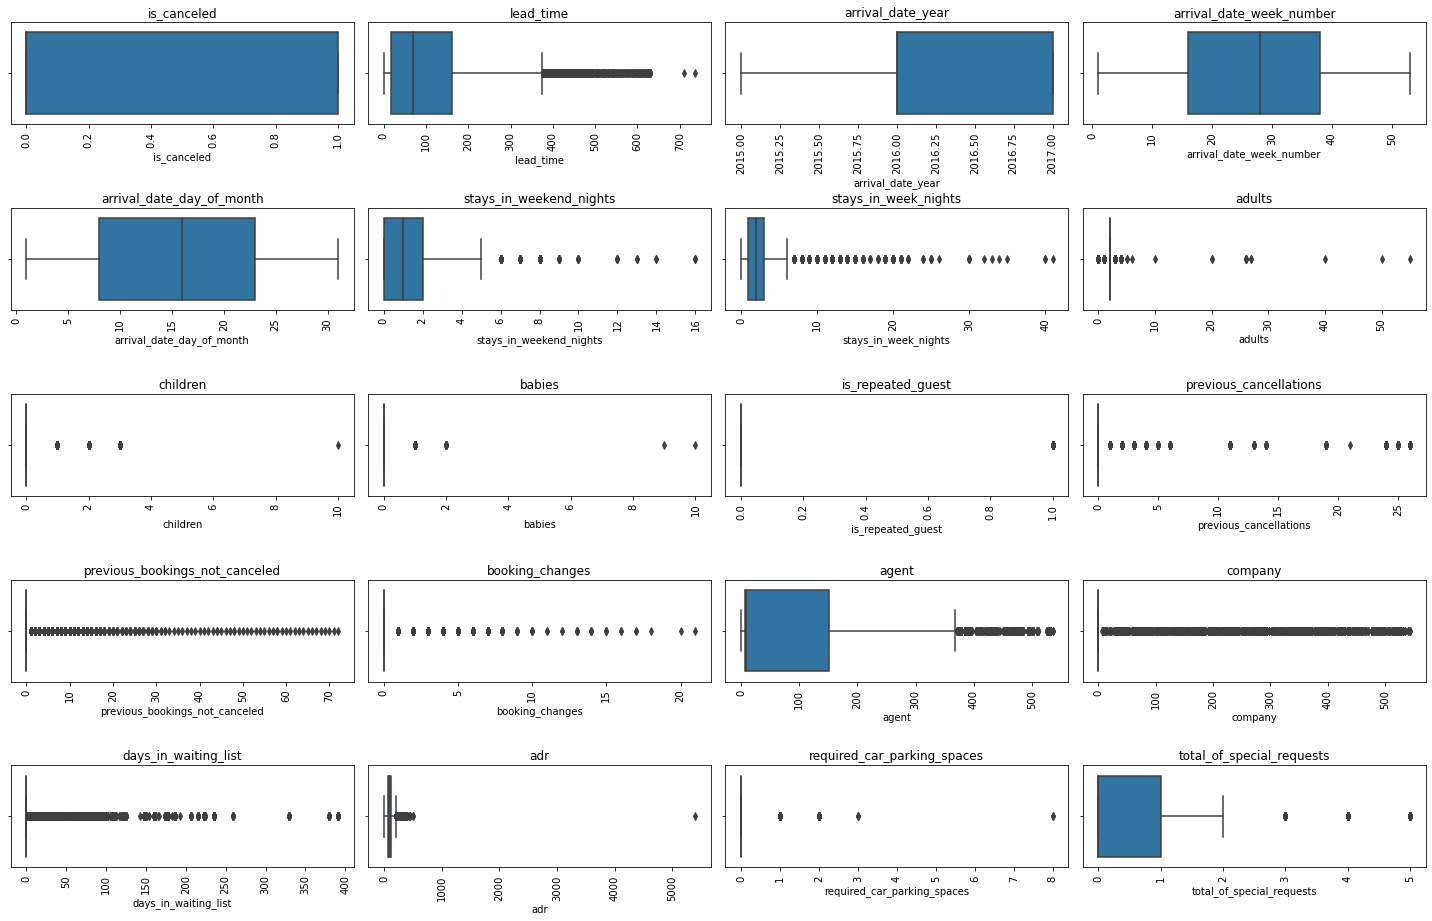

In [28]:
cols = H_B.describe().columns
rows = 8
columns = 4
iterator = 1


# iterator defines the plot area.
plt.figure(figsize = (20,20))
for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.boxplot(H_B.loc[:,i])
    plt.title(i)
    iterator = iterator+1
    plt.xticks(rotation = 90)
    
plt.tight_layout() # tight layout will keep the plots in perfect shape
plt.show()


- outliers are present in many columns 
- meed to handle the outliers by binning the columns that has outliers in it
- droping columns with 0 adults
- adr daily avg rate 5000 seems an error type

In [29]:
# it's impossible to have 0 adults to book a hotel room 

H_B.drop(labels = H_B[H_B['adults'] == 0].index, axis = 0, inplace = True)
H_B[H_B['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [30]:
# there are a value of a adr columns that below 0 since it is impossible for hotel to owe money to the guest 
H_B = H_B.drop(H_B[H_B.adr < 0].index)
H_B[H_B['adr'] <0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [31]:
H_B = H_B.drop(H_B[H_B.adr > 5000].index)
H_B[H_B['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [32]:
# Guest, Kids and Children

In [33]:
H_B['kids'] = H_B['children'] + H_B['babies']
H_B.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


In [34]:
H_B['guests'] = H_B['adults'] + H_B['kids']
H_B.head()

# total guest of the hotel booking by adding the babies children and babies



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


In [35]:
# children and babies, now is combined into kids so dropping children and babies
H_B = H_B.drop(columns = ['babies', 'children'])
H_B.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0,2.0


In [36]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118507 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118507 non-null  object 
 1   is_canceled                     118507 non-null  int64  
 2   lead_time                       118507 non-null  int64  
 3   arrival_date_year               118507 non-null  int64  
 4   arrival_date_month              118507 non-null  object 
 5   arrival_date_week_number        118507 non-null  int64  
 6   arrival_date_day_of_month       118507 non-null  int64  
 7   stays_in_weekend_nights         118507 non-null  int64  
 8   stays_in_week_nights            118507 non-null  int64  
 9   adults                          118507 non-null  int64  
 10  meal                            118507 non-null  object 
 11  country                         118507 non-null  object 
 12  market_segment  

In [37]:
H_B.dropna(axis=0, inplace = True, subset=['guests'])

In [38]:
H_B.dropna(axis=0, inplace = True, subset=['kids'])

In [39]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118503 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118503 non-null  object 
 1   is_canceled                     118503 non-null  int64  
 2   lead_time                       118503 non-null  int64  
 3   arrival_date_year               118503 non-null  int64  
 4   arrival_date_month              118503 non-null  object 
 5   arrival_date_week_number        118503 non-null  int64  
 6   arrival_date_day_of_month       118503 non-null  int64  
 7   stays_in_weekend_nights         118503 non-null  int64  
 8   stays_in_week_nights            118503 non-null  int64  
 9   adults                          118503 non-null  int64  
 10  meal                            118503 non-null  object 
 11  country                         118503 non-null  object 
 12  market_segment  

Cleaning data and missng values has been done

In [40]:
# EDA

In [41]:
H_B.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids,guests
count,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000,118503.000000
mean,0.371746,104.362835,2016.157481,27.166139,15.799026,0.928187,2.500755,1.864552,0.031636,0.087356,0.131836,0.218535,75.074040,10.566121,2.335063,102.129104,0.062015,0.570922,0.108681,1.973233
std,0.483273,106.931234,0.707716,13.583985,8.780506,0.992839,1.889720,0.569538,0.175031,0.847206,1.486686,0.638477,107.231932,53.511050,17.649504,47.996715,0.244417,0.792264,0.405042,0.719118
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,0.000000,126.000000,0.000000,1.000000,0.000000,2.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,10.000000,55.000000


In [42]:
H_B.describe(include = 'O')
# for categorical variables

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,118503,118503,118503,118503,118503,118503,118503,118503,118503,118503,118503,118503
unique,2,12,5,177,7,5,9,11,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,78919,13804,91571,48435,56146,97421,85468,73792,103769,88906,74450,1460


In [43]:
# UNIVARIANT ANALYSIS

In [44]:
# Hotel type
h = H_B['hotel'].value_counts()
h

City Hotel      78919
Resort Hotel    39584
Name: hotel, dtype: int64

<AxesSubplot:ylabel='hotel'>

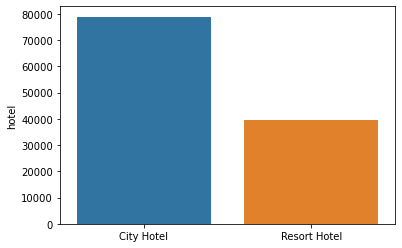

In [45]:
sns.barplot(x=h.index, y=h)

In [46]:
# cancellation
i = H_B['is_canceled'].value_counts()
i

0    74450
1    44053
Name: is_canceled, dtype: int64

<AxesSubplot:ylabel='is_canceled'>

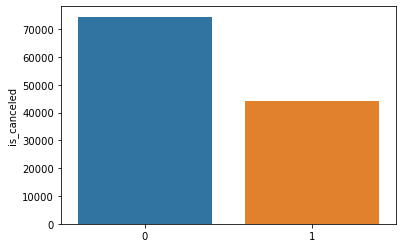

In [47]:
sns.barplot(x=i.index, y=i)

In [48]:
# lead time
H_B['lead_time'].value_counts()

0      6146
1      3374
2      2029
3      1798
4      1691
       ... 
400       1
370       1
435       1
532       1
463       1
Name: lead_time, Length: 479, dtype: int64

In [49]:
# many leadtimes so we group them into months
lt_months = H_B['lead_time'] // 30
lt_months.value_counts() / len(H_B)

0     0.316422
1     0.144494
2     0.106968
3     0.088124
4     0.067863
5     0.066488
6     0.047948
7     0.036725
9     0.029037
8     0.028717
10    0.023096
11    0.015080
12    0.008245
13    0.006886
15    0.004776
14    0.004481
20    0.001224
16    0.001038
17    0.001030
18    0.000768
19    0.000574
24    0.000008
23    0.000008
Name: lead_time, dtype: float64

In [50]:
H_B['lead_time_month'] = H_B['lead_time'] // 30

In [51]:
lt = H_B['lead_time_month'].value_counts()
lt

0     37497
1     17123
2     12676
3     10443
4      8042
5      7879
6      5682
7      4352
9      3441
8      3403
10     2737
11     1787
12      977
13      816
15      566
14      531
20      145
16      123
17      122
18       91
19       68
24        1
23        1
Name: lead_time_month, dtype: int64

<AxesSubplot:ylabel='lead_time_month'>

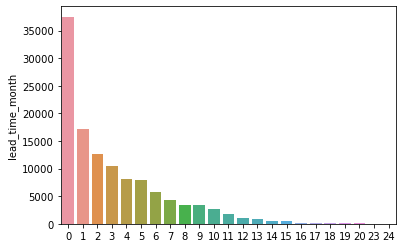

In [52]:
sns.barplot(x=lt.index, y=lt)

In [53]:
# DISTRIBUTION CHANNEL

In [54]:
dc = H_B['distribution_channel'].value_counts()
dc
# travel agencies is the biggest booking distribution channel
# second highest is direct

TA/TO        97421
Direct       14416
Corporate     6472
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

<AxesSubplot:ylabel='distribution_channel'>

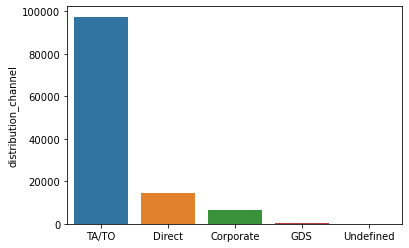

In [55]:
sns.barplot(x=dc.index, y=dc)

In [56]:
# MARKET SEGMENT

In [57]:
ms = H_B['market_segment'].value_counts()
ms
# same as distribution channels

Online TA        56146
Offline TA/TO    24121
Groups           19785
Direct           12395
Corporate         5099
Complementary      722
Aviation           235
Name: market_segment, dtype: int64

<AxesSubplot:ylabel='market_segment'>

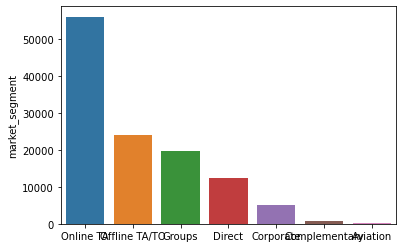

In [58]:
sns.barplot(x=ms.index, y=ms)

In [59]:
# MEAL COLUMN

In [60]:
H_B['meal'] = H_B['meal'].replace(to_replace='Undefined', value='SC')


In [61]:
m = H_B['meal'].value_counts()
m

# Undefined values in meal package 
# by description undefined meal package is same as sc
# so replacing undefined with SC

BB    91571
HB    14425
SC    11709
FB      798
Name: meal, dtype: int64

<AxesSubplot:ylabel='meal'>

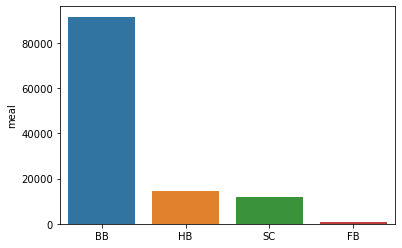

In [62]:
sns.barplot(x=m.index, y=m)

In [63]:
# country

In [64]:
c = H_B['country'].value_counts().head(10)
c
# half of booking were done by portuguese
# many unique values from all the countries 
# spliting the booking into international booking or local booking 

PRT    48435
GBR    12104
FRA    10376
ESP     8546
DEU     7271
ITA     3752
IRL     3370
BEL     2326
BRA     2212
NLD     2094
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

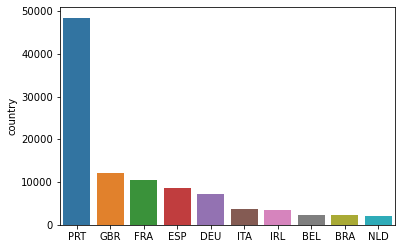

In [65]:
sns.barplot(x=c.index, y=c)

In [66]:
def country(row):
    if (row['country'] == 'PRT'):
        return 0
    else :
        return 1
    
H_B['booking_location'] = H_B.apply(country, axis = 1)

In [67]:
bl = H_B['booking_location'].value_counts()
bl

1    70068
0    48435
Name: booking_location, dtype: int64

<AxesSubplot:ylabel='booking_location'>

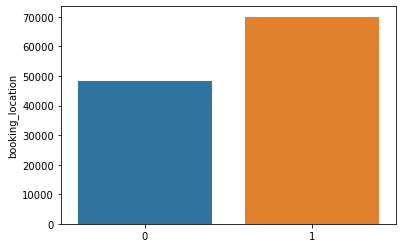

In [68]:
sns.barplot(x=bl.index, y=bl)

In [69]:
# RESERVED ROOM TYPE

In [70]:
rt = H_B['reserved_room_type'].value_counts()
rt
# A type is most popular compared to other types

A    85468
D    19150
E     6480
F     2885
G     2080
C      930
B      903
H      601
L        6
Name: reserved_room_type, dtype: int64

<AxesSubplot:ylabel='reserved_room_type'>

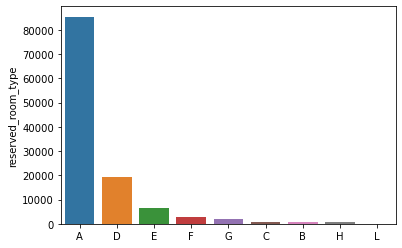

In [71]:
sns.barplot(x=rt.index, y=rt)

In [72]:
# DEPOSIT TYPE

In [73]:
dt = H_B['deposit_type'].value_counts()
dt
#  no deposit type is more popular 
# the flexibility that's given to the customer to book hotel without any deposit

No Deposit    103769
Non Refund     14572
Refundable       162
Name: deposit_type, dtype: int64

<AxesSubplot:ylabel='deposit_type'>

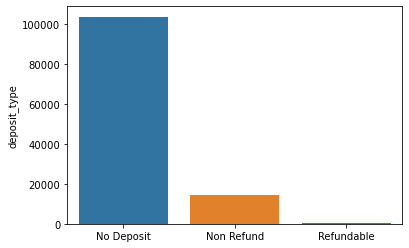

In [74]:
sns.barplot(x=dt.index, y=dt)

In [75]:
# REPEATED GUEST

In [76]:
rg = H_B['is_repeated_guest'].value_counts()
rg
# approx 3 percent of the repeated guest 
# repeated guest may effect the cancellation

0    114754
1      3749
Name: is_repeated_guest, dtype: int64

<AxesSubplot:ylabel='is_repeated_guest'>

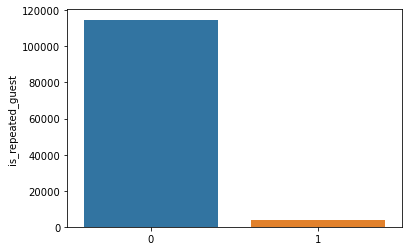

In [77]:
sns.barplot(x=rg.index, y=rg)

In [78]:
# PREVIOUS CANCELLATION

In [79]:
H_B['previous_cancellations'].value_counts()

# aprrox 94% of data has never been cancelled so we group it into cancelled and non cancelled

0     112063
1       6012
2        111
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [80]:
def cancellation(row):
    if (row['previous_cancellations'] == 0):
        return 0
    else :
        return 1

H_B['is_previously_cancelled'] = H_B.apply(cancellation, axis = 1)

In [81]:
pc = H_B['is_previously_cancelled'].value_counts()
pc

0    112063
1      6440
Name: is_previously_cancelled, dtype: int64

<AxesSubplot:ylabel='is_previously_cancelled'>

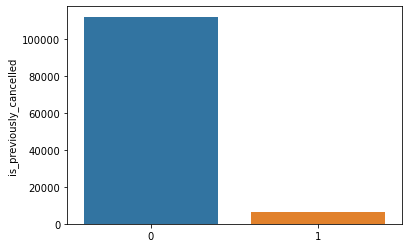

In [82]:
sns.barplot(x=pc.index, y=pc)

In [83]:
# BOOKING CHANGES

In [84]:
H_B['booking_changes'].value_counts()
# approx 94% never changed there booking
# can group this columns as never changed and changed

0     100664
1      12558
2       3758
3        908
4        366
5        114
6         61
7         28
8         14
9          8
10         6
13         5
14         3
15         3
17         2
16         2
12         1
18         1
11         1
Name: booking_changes, dtype: int64

In [85]:
def changes(row):
    if (row['booking_changes'] == 0):
        return 0
    else :
        return 1

H_B['is_booking_changes'] = H_B.apply(changes, axis = 1)

In [86]:
bc = H_B['is_booking_changes'].value_counts()
bc

0    100664
1     17839
Name: is_booking_changes, dtype: int64

<AxesSubplot:ylabel='is_booking_changes'>

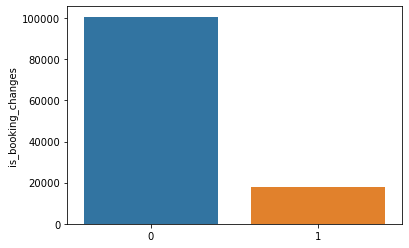

In [87]:
sns.barplot(x=bc.index, y=bc)

In [88]:
# SPECIAL REQUEST

In [89]:
sr = H_B['total_of_special_requests'].value_counts()
sr
# will booking there's no special request

0    69814
1    32980
2    12864
3     2470
4      337
5       38
Name: total_of_special_requests, dtype: int64

<AxesSubplot:ylabel='total_of_special_requests'>

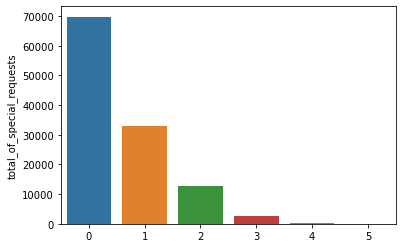

In [90]:
sns.barplot(x=sr.index, y=sr)

In [91]:
# CUSTOMER TYPE

In [92]:
ct = H_B['customer_type'].value_counts()
ct
# transient - individual booking / personal booking

Transient          88906
Transient-Party    24959
Contract            4071
Group                567
Name: customer_type, dtype: int64

<AxesSubplot:ylabel='customer_type'>

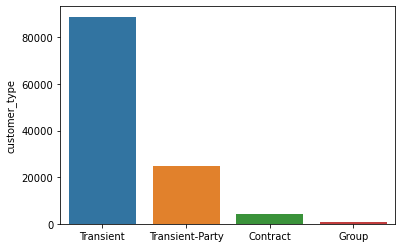

In [93]:
sns.barplot(x=ct.index, y=ct)

In [94]:
# ARRIVAL DATA 

In [95]:
H_B['arrival_date'] = H_B['arrival_date_year'].astype(str) + '-' + H_B['arrival_date_month'] + '-' + H_B['arrival_date_day_of_month'].astype(str)
H_B['arrival_date'] = pd.to_datetime(H_B['arrival_date'])

In [96]:
am = H_B['arrival_date_month'].value_counts()
am

August       13804
July         12578
May          11752
October      11066
April        11017
June         10905
September    10448
March         9694
February      7979
November      6725
December      6687
January       5848
Name: arrival_date_month, dtype: int64

<AxesSubplot:ylabel='arrival_date_month'>

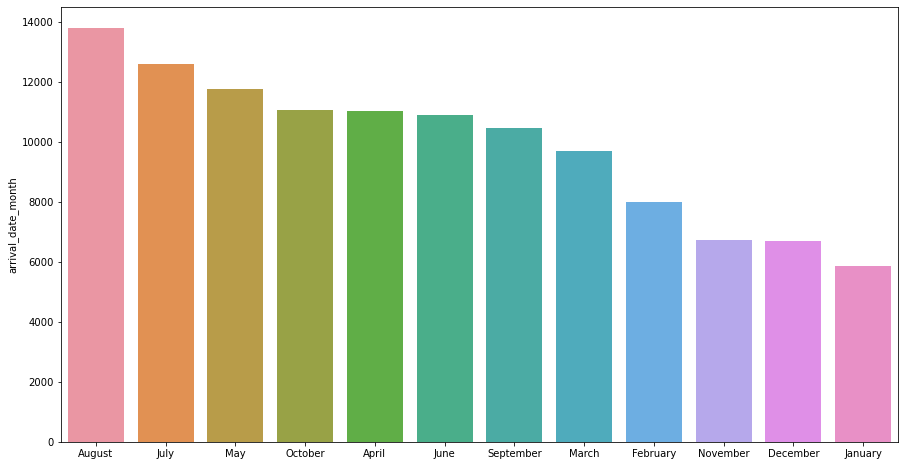

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(x=am.index, y=am)

In [98]:
H_B['arrival_day'] = H_B['arrival_date'].dt.day_name()
H_B.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,kids,guests,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,arrival_date,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,0.0,2.0,11,0,0,1,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,0.0,2.0,24,0,0,1,2015-07-01,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,0.0,1.0,0,1,0,0,2015-07-01,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,0.0,1.0,0,1,0,0,2015-07-01,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,0.0,2.0,0,1,0,0,2015-07-01,Wednesday


In [99]:
ad = H_B['arrival_day'].value_counts()
ad
# from the data we can observe that firday and thrusday arrivals are more

Friday       19512
Thursday     19112
Monday       18056
Saturday     17955
Wednesday    15964
Sunday       14059
Tuesday      13845
Name: arrival_day, dtype: int64

<AxesSubplot:ylabel='arrival_day'>

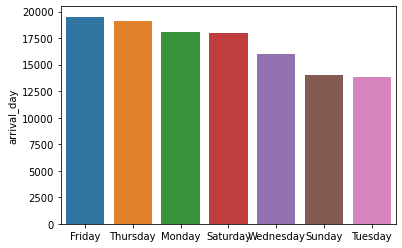

In [100]:
sns.barplot(x=ad.index, y=ad)

In [101]:
# stay columns

In [102]:
H_B['total_stays'] = H_B['stays_in_weekend_nights'] + H_B['stays_in_week_nights']

In [103]:
H_B.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status_date,kids,guests,lead_time_month,booking_location,is_previously_cancelled,is_booking_changes,arrival_date,arrival_day,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,2015-07-01,0.0,2.0,11,0,0,1,2015-07-01,Wednesday,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,2015-07-01,0.0,2.0,24,0,0,1,2015-07-01,Wednesday,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,2015-07-02,0.0,1.0,0,1,0,0,2015-07-01,Wednesday,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,2015-07-02,0.0,1.0,0,1,0,0,2015-07-01,Wednesday,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,2015-07-03,0.0,2.0,0,1,0,0,2015-07-01,Wednesday,2


In [104]:
# MULTIVARIANCE ANALYSIS

In [105]:
# Hotel type and cancellation
pd.crosstab(H_B['hotel'], H_B['is_canceled'], normalize = 'index')
# city hotel cancellations are more than the resort type hotel cancellation
# from the data we can assume that increase in number of bookings has a chance of increase in number of cancellation(positively correlated)

is_canceled,0,1
hotel,,
City Hotel,0.582154,0.417846
Resort Hotel,0.720165,0.279835


In [106]:
# LEAD TIME AND CANCELLATION
pd.crosstab(H_B['lead_time_month'], H_B['is_canceled'], normalize = 'index')

# can see that longer lead time has a high chances of  cancellation 
# more than 7 months have a high chances of cancellation

is_canceled,0,1
lead_time_month,,
0,0.816279,0.183721
1,0.635928,0.364072
2,0.602083,0.397917
3,0.558556,0.441444
4,0.563293,0.436707
5,0.537505,0.462495
6,0.552974,0.447026
7,0.531250,0.468750
8,0.449897,0.550103


In [107]:
# ARRIVAL DATE YEAR AND CANCELLATION

In [108]:
pd.crosstab(H_B['arrival_date_year'], H_B['is_canceled'], normalize = 'index')
# we have only half yearly data in 2015 nd 2017 so can't interference properly

is_canceled,0,1
arrival_date_year,,
2015,0.628696,0.371304
2016,0.639626,0.360374
2017,0.612224,0.387776


In [109]:
# ARRIVAL MONTH DATA AND CANCELLATION

In [110]:
pd.crosstab(H_B['arrival_date_month'], H_B['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# JUNE, APRIL, MAY CANCELLATION IS HIGH

is_canceled,0,1
arrival_date_month,,
June,0.584594,0.415406
April,0.591359,0.408641
May,0.602706,0.397294
September,0.608346,0.391654
October,0.618110,0.381890
August,0.621776,0.378224
July,0.624662,0.375338
December,0.647974,0.352026
February,0.663241,0.336759


In [111]:
# NUMBER OF ADULTS, KIDS AND CANCELLATION

In [112]:
pd.crosstab(H_B['adults'], H_B['is_canceled'], normalize = 'index').sort_values(1, ascending = False)

# morethan 4 adults is always been cancelled

is_canceled,0,1
adults,,
5,0.000000,1.000000
6,0.000000,1.000000
10,0.000000,1.000000
20,0.000000,1.000000
26,0.000000,1.000000
27,0.000000,1.000000
40,0.000000,1.000000
50,0.000000,1.000000
55,0.000000,1.000000


In [113]:
pd.crosstab(H_B['kids'], H_B['is_canceled'], normalize = 'index')
# kids do not have correlation with cancellation

is_canceled,0,1
kids,,
0.0,0.626371,0.373629
1.0,0.691217,0.308783
2.0,0.587262,0.412738
3.0,0.731959,0.268041
9.0,1.000000,0.000000
10.0,0.500000,0.500000


In [114]:
# BOOKING MEAL PACKAGE AND CANCELLATION

In [115]:
pd.crosstab(H_B['meal'], H_B['is_canceled'], normalize = 'index')

# booking with  full board meal has likely more cancellation when compare to other meals

is_canceled,0,1
meal,,
BB,0.624739,0.375261
FB,0.401003,0.598997
HB,0.654766,0.345234
SC,0.638569,0.361431


In [116]:
# booking location and cancellation

In [117]:
pd.crosstab(H_B['booking_location'], H_B['is_canceled'], normalize = 'index')

# international cancellation is much less when compare to the portugal cancellation

is_canceled,0,1
booking_location,,
0,0.432456,0.567544
1,0.763601,0.236399


In [118]:
# MARKET SEGMENT AND CANCELLATION

In [119]:
pd.crosstab(H_B['market_segment'], H_B['is_canceled'], normalize = 'index')
# market segment through groups has high number of cancellation when compare to others
# lowest is direct/individual
# 

is_canceled,0,1
market_segment,,
Aviation,0.778723,0.221277
Complementary,0.878116,0.121884
Corporate,0.808198,0.191802
Direct,0.845664,0.154336
Groups,0.388729,0.611271
Offline TA/TO,0.657187,0.342813
Online TA,0.632049,0.367951


In [120]:
pd.crosstab(H_B['distribution_channel'], H_B['is_canceled'], normalize = 'index')
# travel agency online and / offline has high number of cancellation

is_canceled,0,1
distribution_channel,,
Corporate,0.775340,0.224660
Direct,0.824223,0.175777
GDS,0.808290,0.191710
TA/TO,0.589123,0.410877
Undefined,1.000000,0.000000


In [121]:
# booking changes and cancellation
pd.crosstab(H_B['is_previously_cancelled'], H_B['is_canceled'], normalize = 'index')

# previously cancelled are likely to cancelled again (92 %)


is_canceled,0,1
is_previously_cancelled,,
0,0.659665,0.340335
1,0.081677,0.918323


In [122]:
# deposit type and cancellation

pd.crosstab(H_B['deposit_type'], H_B['is_canceled'], normalize = 'index')
# non refund deposit type has high cancellation


is_canceled,0,1
deposit_type,,
No Deposit,0.715349,0.284651
Non Refund,0.006382,0.993618
Refundable,0.777778,0.222222


In [123]:
# special request and cancellation
pd.crosstab(H_B['total_of_special_requests'], H_B['is_canceled'], normalize = 'index')
# higher the special requests lower the cancellation (negative correlation)

is_canceled,0,1
total_of_special_requests,,
0,0.520784,0.479216
1,0.779290,0.220710
2,0.779073,0.220927
3,0.822267,0.177733
4,0.893175,0.106825
5,0.973684,0.026316


In [124]:
# parking space and cancellation
pd.crosstab(H_B['required_car_parking_spaces'], H_B['is_canceled'], normalize='index')
# seems like who need car parking space never cancelled

is_canceled,0,1
required_car_parking_spaces,,
0,0.603847,0.396153
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
8,1.000000,0.000000


<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

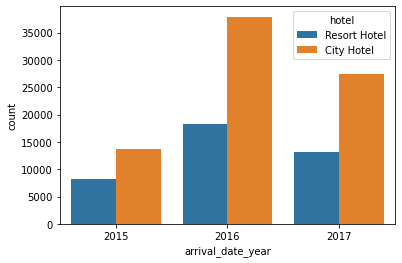

In [125]:
sns.countplot(x='arrival_date_year', hue='hotel', data=H_B)

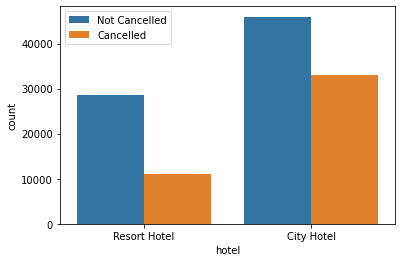

In [126]:
sns.countplot(x='hotel', hue='is_canceled', data=H_B)
plt.legend(['Not Cancelled', 'Cancelled'])

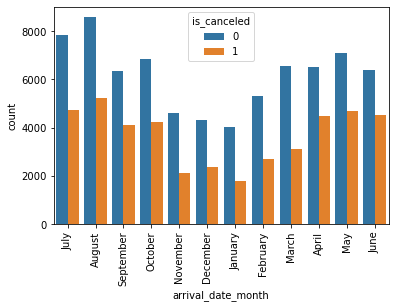

In [127]:
sns.countplot(H_B['arrival_date_month'], hue = H_B['is_canceled'])
plt.xticks(rotation = 90)

plt.show()

# as we can see from the chart below the number of cancellation generally goes up as the number of booking goes up
# however it doesn't seem number of cancellation has a linear effect towards number of booking 
# as we can see that there are certain month that has a higher percentage of confirmed booking compared to other months 

Text(0.5, 1.0, 'Daily rate by customer type')

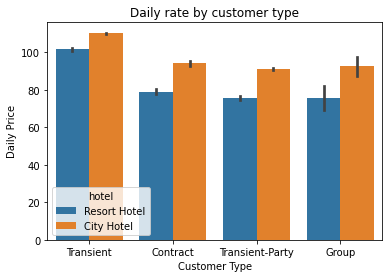

In [128]:
sns.barplot(x='customer_type', y='adr', hue='hotel', data=H_B)
plt.ylabel("Daily Price")
plt.xlabel("Customer Type")
plt.title("Daily rate by customer type")

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

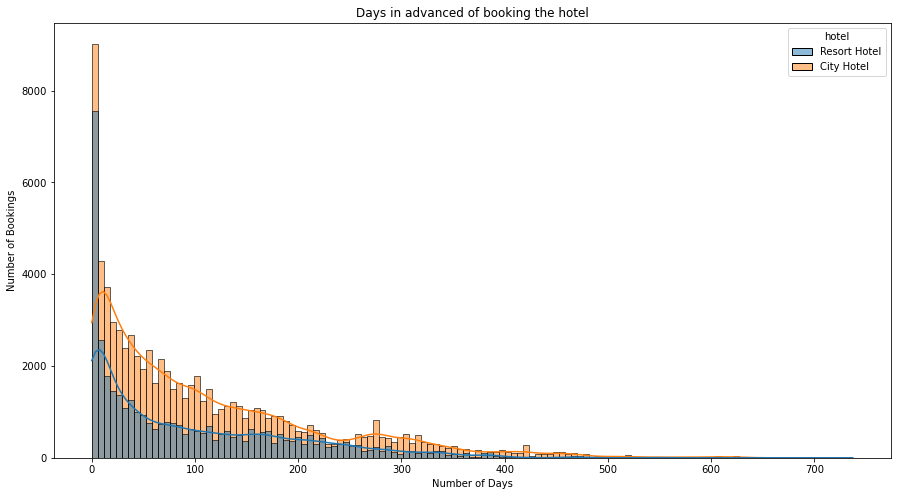

In [129]:
plt.figure(figsize=(15,8))
sns.histplot(x='lead_time', hue='hotel', data=H_B, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

In [130]:
# Modeling

In [131]:
H_B.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [132]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118503 entries, 0 to 119389
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118503 non-null  object        
 1   is_canceled                     118503 non-null  int64         
 2   lead_time                       118503 non-null  int64         
 3   arrival_date_year               118503 non-null  int64         
 4   arrival_date_month              118503 non-null  object        
 5   arrival_date_week_number        118503 non-null  int64         
 6   arrival_date_day_of_month       118503 non-null  int64         
 7   stays_in_weekend_nights         118503 non-null  int64         
 8   stays_in_week_nights            118503 non-null  int64         
 9   adults                          118503 non-null  int64         
 10  meal                            118503 non-null  object 

In [133]:
H_B['hotel_encoded'] = H_B['hotel'].map({'City Hotel': 1, 'Resort Hotel':0})


<AxesSubplot:>

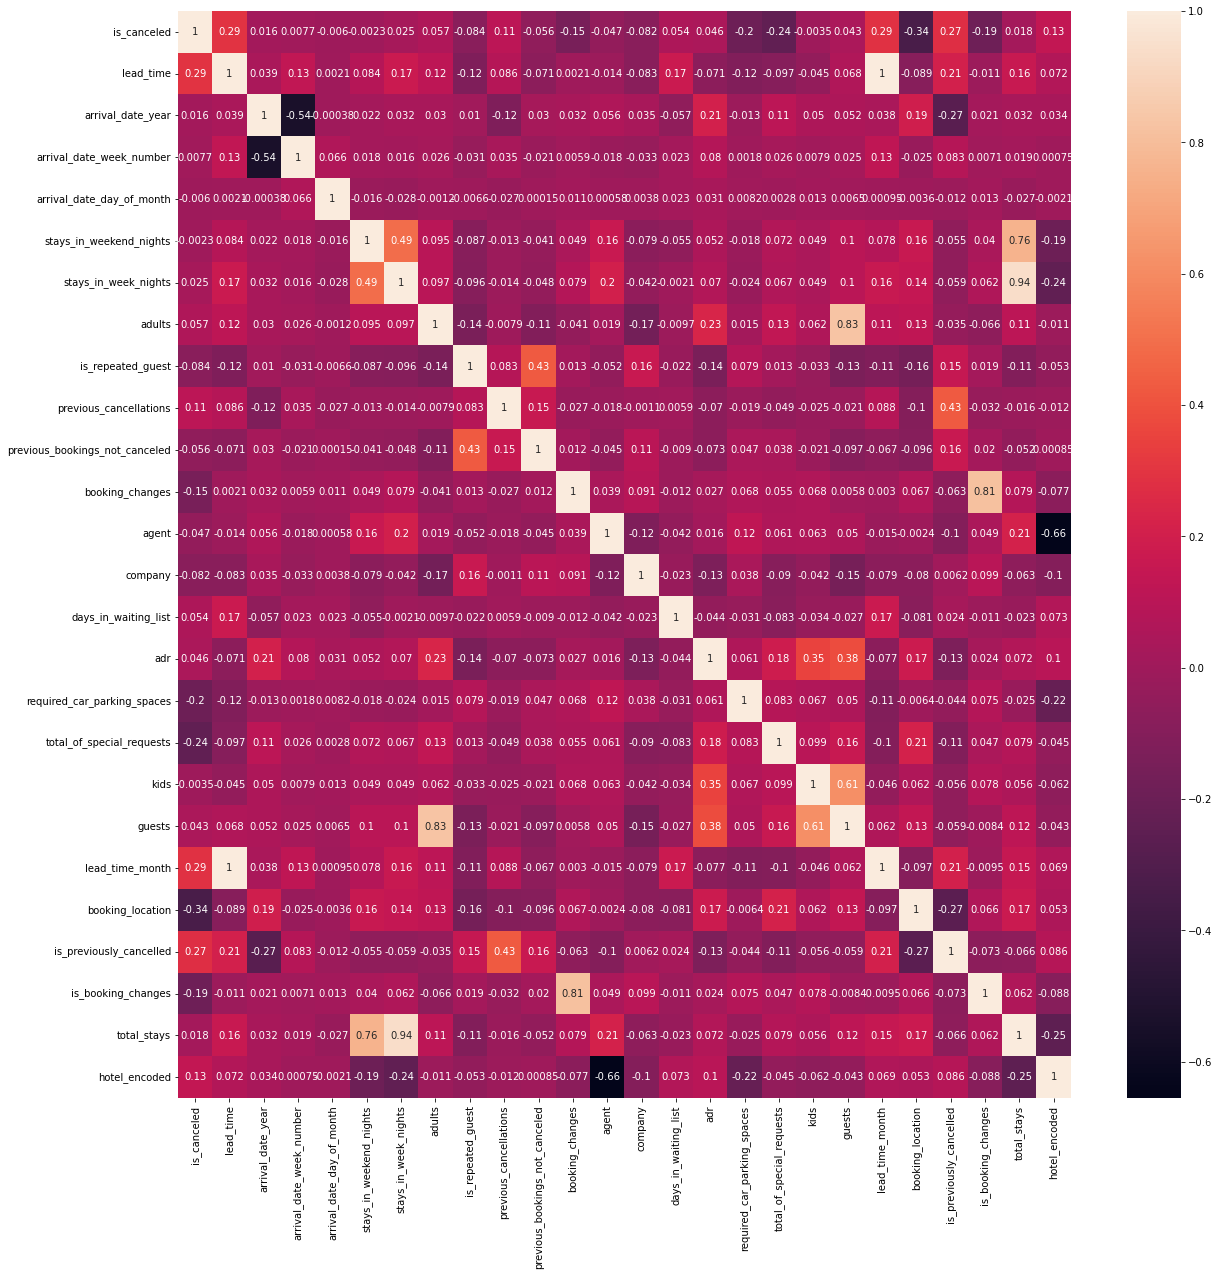

In [134]:
plt.figure(figsize=(20,20))
sns.heatmap(H_B.corr(),annot = True)

In [135]:
H_B.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids', 'guests',
       'lead_time_month', 'booking_location', 'is_previously_cancelled',
       'is_booking_changes', 'arrival_date', 'arrival_day', 'total_stays',
       'hotel_encoded'],
      dtype='object')

In [136]:
H_B.select_dtypes(include = 'object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'arrival_day'],
      dtype='object')

In [137]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV,StratifiedKFold,KFold
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [138]:
H_B = pd.get_dummies(H_B, columns=['meal', 'customer_type', 'deposit_type', 'market_segment', 'distribution_channel'])


In [139]:
# drop the columns which we have used in feature engineering and created same meaning feature
H_B.drop(['hotel', 'assigned_room_type', 'reserved_room_type','booking_changes', 'reservation_status', 'reservation_status_date', 'arrival_date','arrival_date_month','arrival_day','country'], axis = 1, inplace = True)

In [140]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118503 entries, 0 to 119389
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118503 non-null  int64  
 1   lead_time                       118503 non-null  int64  
 2   arrival_date_year               118503 non-null  int64  
 3   arrival_date_week_number        118503 non-null  int64  
 4   arrival_date_day_of_month       118503 non-null  int64  
 5   stays_in_weekend_nights         118503 non-null  int64  
 6   stays_in_week_nights            118503 non-null  int64  
 7   adults                          118503 non-null  int64  
 8   is_repeated_guest               118503 non-null  int64  
 9   previous_cancellations          118503 non-null  int64  
 10  previous_bookings_not_canceled  118503 non-null  int64  
 11  agent                           118503 non-null  float64
 12  company         

In [141]:
X = H_B.drop(columns=['is_canceled'], axis=1)
y = H_B['is_canceled']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((82952, 47), (82952,), (35551, 47), (35551,))

In [143]:
ss = StandardScaler()
ss.fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

In [144]:
import statsmodels.api as sm
Xc = sm.add_constant(X)


In [145]:
model = sm.Logit(y,Xc).fit(method='bfgs')
print(model.summary)

         Current function value: 0.396299
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 43
<bound method BinaryResults.summary of <statsmodels.discrete.discrete_model.LogitResults object at 0x7fe19b503940>>


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [146]:
from sklearn.dummy import DummyClassifier

In [147]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
print('Baseline Training Score: ',dummy.score(X_train, y_train))
print('Baseline Testing Score: ',dummy.score(X_test, y_test))

Baseline Training Score:  0.6285442183431382
Baseline Testing Score:  0.6275772833394279


In [148]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

y_pred_lr = lr.predict(X_test_std)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_lr = confusion_matrix(y_test, y_pred_lr)
clf_rep_lr = classification_report(y_test, y_pred_lr)

print('Accuracy Score of Logistic Regression is :', acc_lr)
print('Confusion Matrix : ',conf_lr)
print('Classification Report : ', clf_rep_lr)




Accuracy Score of Logistic Regression is : 0.8090067789935586
Confusion Matrix :  [[20347  1964]
 [ 4826  8414]]
Classification Report :                precision    recall  f1-score   support

           0       0.81      0.91      0.86     22311
           1       0.81      0.64      0.71     13240

    accuracy                           0.81     35551
   macro avg       0.81      0.77      0.78     35551
weighted avg       0.81      0.81      0.80     35551



In [149]:
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

y_pred_knn = knn.predict(X_test_std)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf_knn = confusion_matrix(y_test, y_pred_knn)
clf_rep_knn = classification_report(y_test, y_pred_knn)

print('Accuracy Score of KNN is : ',acc_knn)
print('Confusion Matrix : ',conf_knn)
print('Classification Report : ',clf_rep_knn)

Accuracy Score of KNN is :  0.843042389806194
Confusion Matrix :  [[19968  2343]
 [ 3237 10003]]
Classification Report :                precision    recall  f1-score   support

           0       0.86      0.89      0.88     22311
           1       0.81      0.76      0.78     13240

    accuracy                           0.84     35551
   macro avg       0.84      0.83      0.83     35551
weighted avg       0.84      0.84      0.84     35551



In [150]:
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)

y_pred_rf = rf.predict(X_test_std)

acc_rf = accuracy_score(y_test, y_pred_rf)
conf_rf = confusion_matrix(y_test, y_pred_rf)
clf_rep_rf = classification_report(y_test, y_pred_rf)

print('Accuracy Score of Random Forest is : ',acc_rf)
print('Confusion Matrix : ', conf_rf)
print('Classification Report : ',clf_rep_rf)

Accuracy Score of Random Forest is :  0.8888920142893308
Confusion Matrix :  [[20870  1441]
 [ 2509 10731]]
Classification Report :                precision    recall  f1-score   support

           0       0.89      0.94      0.91     22311
           1       0.88      0.81      0.84     13240

    accuracy                           0.89     35551
   macro avg       0.89      0.87      0.88     35551
weighted avg       0.89      0.89      0.89     35551



In [151]:
H_B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118503 entries, 0 to 119389
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118503 non-null  int64  
 1   lead_time                       118503 non-null  int64  
 2   arrival_date_year               118503 non-null  int64  
 3   arrival_date_week_number        118503 non-null  int64  
 4   arrival_date_day_of_month       118503 non-null  int64  
 5   stays_in_weekend_nights         118503 non-null  int64  
 6   stays_in_week_nights            118503 non-null  int64  
 7   adults                          118503 non-null  int64  
 8   is_repeated_guest               118503 non-null  int64  
 9   previous_cancellations          118503 non-null  int64  
 10  previous_bookings_not_canceled  118503 non-null  int64  
 11  agent                           118503 non-null  float64
 12  company         

In [152]:
from sklearn.naive_bayes import GaussianNB

In [153]:
models = []


models.append(('LogisticRegression', LogisticRegression(solver='liblinear')))
models.append(('Naive bayes', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))

In [154]:
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    print(confusion_matrix(predictions, y_test))
    
    print(accuracy_score(predictions, y_test))
    print('\n')

LogisticRegression
[[20390  4843]
 [ 1921  8397]]
0.8097381226969705


Naive bayes
[[13086  2210]
 [ 9225 11030]]
0.6783494135186071


RandomForest
[[20874  2546]
 [ 1437 10694]]
0.8879637703580772


Decision Tree
[[19763  2638]
 [ 2548 10602]]
0.8541250597732835


KNN
[[19062  4631]
 [ 3249  8609]]
0.7783466006582094




In [155]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [156]:
model_dict={'logreg':LogisticRegression(),
            'Decision tree':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(),
            'Ada Boost':AdaBoostClassifier(),
           'KNN': KNeighborsClassifier()}

In [ ]:
model_f1_score=[]
model_accuracy_score=[]
for i in model_dict.values():
    f1 = cross_val_score(estimator=i,X=X,y=y,scoring='f1_weighted',cv=kf)
    acc = cross_val_score(estimator=i,X=X,y=y,scoring='accuracy',cv=kf)
    model_f1_score.append(np.mean(f1))
    model_accuracy_score.append(np.mean(acc))


In [ ]:
model_f1_score.append(np.mean(f1))

In [ ]:
lg_params = {
    'penalty': ['l1'], 
    'C': [3.5],
    'max_iter': [300]
}

# Perform Grid Search
lg_gs = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                 lg_params,
                 cv = 5,
                 scoring = 'accuracy')
lg = lg_gs.fit(X_train, y_train)